In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Section 0: Functions to create dataset



In [3]:
df_full = pd.read_csv('../labels/coarse_data_2sec.csv', index_col=0)
labeller_ids, labeller_counts = np.unique(df_full['labeller_id'], return_counts=True)

In [4]:
audio_ids, count = np.unique(df_full.index, return_counts=True)  # For size of final matrix
y = np.zeros((len(audio_ids), 2))

/home/ikiskin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


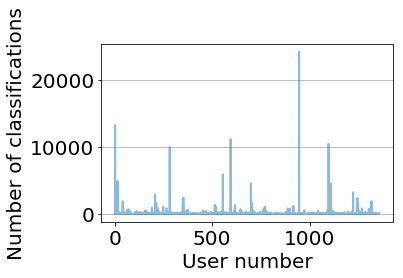

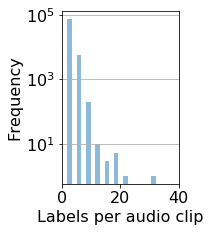

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.plot(labeller_counts, '-', alpha=0.5, linewidth=2) ## sort
plt.grid(axis='y')
plt.ylabel('Number of classifications')
plt.xlabel('User number')
plt.tight_layout()
# # plt.savefig('Figures/n_classifications.pdf')
plt.show()


### Grouped bar plot:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)


plt.figure(figsize=(3,3.5))
plt.hist(count, log=True, alpha=0.5, rwidth=0.5)
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xlabel('Labels per audio clip')
plt.xlim([0,40])
plt.tight_layout()
# plt.savefig('label_frequency_hist.pdf')
plt.show()


### Create labels for turning not sure into 0.5 labels, if single not_sure label, decide what to do!!!

In [7]:
audio_ids, count = np.unique(df_full.index, return_counts=True)  # For size of final matrix

x = []
disagreement = 0  # variable to count how many disagreements there are
n_multiple_labels = 0
for i, audio_id in enumerate(audio_ids):
    if count[i] == 1:
        x.append(df_full['subject_set'].loc[audio_id])  # Append name of subject_set (unique)
        # Create y vector
        if df_full.loc[audio_id]['sound_type'] == 'mosquito':
            y[i,1] = 1
        # The lines below were commented out when creating data for the LCBNN
        elif df_full.loc[audio_id]['sound_type']  == 'not_sure': 
            y[i,1] = 1
        else:
            y[i,0] = 1
    else:
        n_multiple_labels += 1
        x.append(df_full['subject_set'].loc[audio_id].iloc[0])  # Append name of subject_set (first element)
                   
        # Create y vector, decide on voting scheme, and tie break:
        yes_votes = np.array([m == 'mosquito' for m in list(df_full.loc[audio_id]["sound_type"])]).astype(np.int)
        ns_votes = np.array([m == 'not_sure' for m in list(df_full.loc[audio_id]["sound_type"])]).astype(np.int)
#         print(yes_votes + ns_votes)
        assert (yes_votes + ns_votes).shape == yes_votes.shape

        y[i,1] = np.round(np.mean(yes_votes+ns_votes + 1e-10)).astype(np.int)  # added constant to round 0.5 to 1
        y[i,0] = 1 - y[i,1]
        if len(set(yes_votes)) != 1:
            disagreement += 1
                    
    if i%1000 == 0:
        print('Iteration ' + str(i))

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 10000
Iteration 11000
Iteration 12000
Iteration 13000
Iteration 14000
Iteration 15000
Iteration 16000
Iteration 17000
Iteration 18000
Iteration 19000
Iteration 20000
Iteration 21000
Iteration 22000
Iteration 23000
Iteration 24000
Iteration 25000
Iteration 26000
Iteration 27000
Iteration 28000
Iteration 29000
Iteration 30000
Iteration 31000
Iteration 32000
Iteration 33000
Iteration 34000
Iteration 35000
Iteration 36000
Iteration 37000
Iteration 38000
Iteration 39000
Iteration 40000
Iteration 41000
Iteration 42000
Iteration 43000
Iteration 44000
Iteration 45000
Iteration 46000
Iteration 47000
Iteration 48000
Iteration 49000
Iteration 50000
Iteration 51000
Iteration 52000
Iteration 53000
Iteration 54000
Iteration 55000
Iteration 56000
Iteration 57000
Iteration 58000
Iteration 59000
Iteration 60000
Iteration 61000
Iteration 62000
Itera

### Code for creating metadata plots for RAW data with Not sure in each bar group

/home/ikiskin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


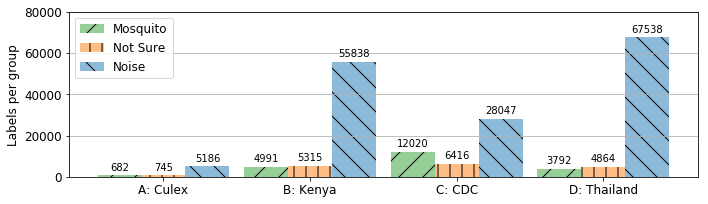

In [8]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

df_Culex = df_full[df_full['subject_set'] == 'Culex Q']
df_Kenya = df_full[df_full['subject_set'] == 'Kenya']
df_CDC = df_full[df_full['subject_set'] == 'CDC']
df_date = df_full[df_full['subject_set'] == '17/11/2017']

labels = ['A: Culex', 'B: Kenya', 'C: CDC', 'D: Thailand']


x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

Not_sure_vector = [len(df_Culex[df_Culex['sound_type'] == 'not_sure']),
                   len(df_Kenya[df_Kenya['sound_type'] == 'not_sure']),
               len(df_CDC[df_CDC['sound_type'] == 'not_sure']),
               len(df_date[df_date['sound_type'] == 'not_sure'])]

Noise_vector = [len(df_Culex[df_Culex['sound_type'] == 'background']),
               len(df_Kenya[df_Kenya['sound_type'] == 'background']),
               len(df_CDC[df_CDC['sound_type'] == 'background']),
               len(df_date[df_date['sound_type'] == 'background'])]

Mosquito_vector = [len(df_Culex[df_Culex['sound_type'] == 'mosquito']),
               len(df_Kenya[df_Kenya['sound_type'] == 'mosquito']),
               len(df_CDC[df_CDC['sound_type'] == 'mosquito']),
               len(df_date[df_date['sound_type'] == 'mosquito'])]



# fig, ax = plt.subplots(1,3, figsize=(10,3), gridspec_kw={'width_ratios': [2, 2, 2]})

plt.figure(figsize=(10,3))
rects1 = plt.bar(x - width, Mosquito_vector, width, label='Mosquito', alpha=0.5, hatch='/', color='C2')
rects2 = plt.bar(x , Not_sure_vector, width, label='Not Sure', alpha=0.5,  color='C1',hatch='|')
rects3 = plt.bar(x + width, Noise_vector, width, label='Noise', alpha=0.5, hatch='\\', color='C0')




# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Labels per group')
# plt.xlabel('(c) Group')
plt.xticks(x, labels)
plt.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10 )



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y')
plt.ylim([0,80000])




# ax[0].hist(count, bins=33, log=True, alpha=0.5, rwidth=0.7, align='mid')
# plt.grid(axis='y')
# ax[0].set_ylabel('Frequency')
# ax[0].set_xlabel('(a) Labels per audio clip')
# # ax[0].tick_params(axis ='both', which ='both', length = 2) 


# ax[1].plot(labeller_counts, '-', alpha=0.5, linewidth=2) ## sort
# ax[1].set_ylabel('Labels per user')
# ax[1].set_xlabel('(b) User ID')


# # ax[0].minorticks_on()



# ax[0].grid(axis='y')
# ax[1].grid(axis='y')
# ax[2].grid(axis='y')


plt.tight_layout()
# plt.savefig('Metadata_raw.pdf')
# plt.show()


In [18]:
y = np.zeros((len(df_full), 2))
x = []

disagreement = 0  # variable to count how many disagreements there are
n_multiple_labels = 0
for i, id_ in enumerate(df_full.index):
    if count[i] == 1:
        x.append(df_full['subject_set'].loc[id_])  # Append name of subject_set (unique)
        # Create y vector
        if df_full.loc[id_]['sound_type'] == 'mosquito':
            y[i,1] = 1
        # The lines below were commented out when creating data for the LCBNN
        elif df_full.loc[id_]['sound_type']  == 'not_sure': 
            y[i,1] = 1
        else:
            y[i,0] = 1
    else:
        n_multiple_labels += 1
        x.append(df_full['subject_set'].loc[id_].iloc[0])  # Append name of subject_set (first element)
                   
        # Create y vector, decide on voting scheme, and tie break:
        yes_votes = np.array([m == 'mosquito' for m in list(df_full.loc[id_]["sound_type"])]).astype(np.int)
        ns_votes = np.array([m == 'not_sure' for m in list(df_full.loc[id_]["sound_type"])]).astype(np.int)
#         print(yes_votes + ns_votes)
        assert (yes_votes + ns_votes).shape == yes_votes.shape

        y[i,1] = np.round(np.mean(yes_votes+ns_votes + 1e-10)).astype(np.int)  # added constant to round 0.5 to 1
        y[i,0] = 1 - y[i,1]
        if len(set(yes_votes)) != 1:
            disagreement += 1
                    
    if i%1000 == 0:
        print('Iteration ' + str(i))
        
        
        
        
        
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 12}

# matplotlib.rc('font', **font)

# labels = ['A', 'B', 'C', 'D']
# maj_votes_array = np.vstack([np.sum(majority_votes[0],0), np.sum(majority_votes[1],0), np.sum(majority_votes[2],0)
#         , np.sum(majority_votes[3],0)])


# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(1,3, figsize=(10,3), gridspec_kw={'width_ratios': [2, 2, 2]})
# rects1 = ax[2].bar(x - width/2, maj_votes_array[:,0], width, label='Noise', alpha=0.5)
# rects2 = ax[2].bar(x + width/2, maj_votes_array[:,1], width, label='Mozz', alpha=0.5)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax[2].set_ylabel('Labels per group')
# ax[2].set_xlabel('(c) Group')
# ax[2].set_xticks(x)
# ax[2].set_xticklabels(labels)
# ax[2].legend(loc='upper left')


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax[2].annotate('{:.0f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=8 )



# autolabel(rects1)
# autolabel(rects2)
# plt.grid(axis='y')
# plt.ylim([0,40000])




# ax[0].hist(count, bins=33, log=True, alpha=0.5, rwidth=0.7, align='mid')
# plt.grid(axis='y')
# ax[0].set_ylabel('Frequency')
# ax[0].set_xlabel('(a) Labels per audio clip')
# # ax[0].tick_params(axis ='both', which ='both', length = 2) 


# ax[1].plot(labeller_counts, '-', alpha=0.5, linewidth=2) ## sort
# ax[1].set_ylabel('Labels per user')
# ax[1].set_xlabel('(b) User ID')


# # ax[0].minorticks_on()



# ax[0].grid(axis='y')
# ax[1].grid(axis='y')
# ax[2].grid(axis='y')


# fig.tight_layout()
# # plt.savefig('Metadata_not_sure_into_yes_single_not_sure_into_0_5_1second.pdf')
# plt.show()



Iteration 0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [9]:
# Number of unique sound chunks: 80100
# Number of labels: 190,000. 110000 only labelled ONCE

print(disagreement/n_multiple_labels)
print(n_multiple_labels/len(audio_ids))
print(n_multiple_labels, len(audio_ids))

0.18171893952521226
0.7204654124168237
57710 80101


In [10]:
n_mosq = len(np.where(df_full['sound_type'] == 'mosquito')[0])
n_back = len(np.where(df_full['sound_type'] == 'background')[0])
n_not_sure = len(np.where(df_full['sound_type'] == 'not_sure')[0])

In [11]:
print(n_mosq, n_back, n_not_sure)

21485 156609 17340


In [12]:
len(np.where(y[:,0]==1)[0])/len(y)

0.7967565947990661

In [13]:
subject_set, subject_set_counts_idx, subject_set_counts_unique = np.unique(x, return_counts=True, return_index=True)
subject_set_counts_unique


a = np.argsort(subject_set_counts_idx)  # Retrieve order of sorted items

In [14]:
index = 0  # Traverse y (majority voted) in order to give label distribution per class
majority_votes = []
for i in range(len(subject_set_counts_unique[a])):
    majority_votes.append(y[index:index+subject_set_counts_unique[a][i]])
    index += subject_set_counts_unique[a][i]

In [15]:
print(np.unique(count, return_counts=True))
print(majority_votes.__len__())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 19,
       23, 33]), array([22391, 24598, 17756,  9376,  3884,  1455,   430,   128,    45,
          18,     5,     3,     2,     1,     2,     3,     2,     1,
           1]))
4


/home/ikiskin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


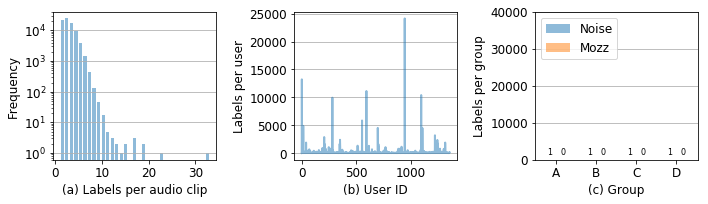

In [16]:
## Grouped bar plot:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

labels = ['A', 'B', 'C', 'D']
maj_votes_array = np.vstack([np.sum(majority_votes[0],0), np.sum(majority_votes[1],0), np.sum(majority_votes[2],0)
        , np.sum(majority_votes[3],0)])


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,3, figsize=(10,3), gridspec_kw={'width_ratios': [2, 2, 2]})
rects1 = ax[2].bar(x - width/2, maj_votes_array[:,0], width, label='Noise', alpha=0.5)
rects2 = ax[2].bar(x + width/2, maj_votes_array[:,1], width, label='Mozz', alpha=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('Labels per group')
ax[2].set_xlabel('(c) Group')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax[2].annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8 )



autolabel(rects1)
autolabel(rects2)
plt.grid(axis='y')
plt.ylim([0,40000])




ax[0].hist(count, bins=33, log=True, alpha=0.5, rwidth=0.7, align='mid')
plt.grid(axis='y')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('(a) Labels per audio clip')
# ax[0].tick_params(axis ='both', which ='both', length = 2) 


ax[1].plot(labeller_counts, '-', alpha=0.5, linewidth=2) ## sort
ax[1].set_ylabel('Labels per user')
ax[1].set_xlabel('(b) User ID')


# ax[0].minorticks_on()



ax[0].grid(axis='y')
ax[1].grid(axis='y')
ax[2].grid(axis='y')


fig.tight_layout()
# plt.savefig('Metadata_not_sure_into_yes_single_not_sure_into_0_5_1second.pdf')
plt.show()



In [17]:
print(len(np.where(count==1)[0]))
print(len(np.where(count==2)[0]))
print(len(np.where(count==3)[0]))
print(len(np.where(count==4)[0]))
print(len(np.where(count==4)[0]))

print(len(np.where(count==4)[0]))

print(len(np.where(count==8)[0]))



22391
24598
17756
9376
9376
9376
128
